# 1D inversion of magnetotelluric data
## Example 1: inversion of synthetic MT data

## 0. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cofi
from espresso import Magnetotelluric1D

### Create synthetic data given a simple 3 layers Earth model

In [2]:
mt = Magnetotelluric1D(example_number=1)

#### 0.1. Define a synthetic resistivity model and plot it

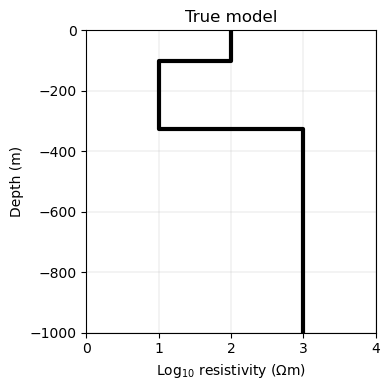

In [3]:
fig = mt.plot_model(mt.good_model, title='True model')

#### 0.2. Load and plot responses of this model (plus added noise)

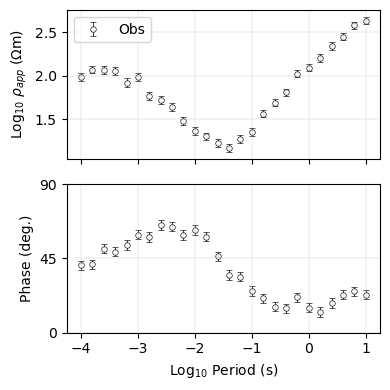

In [4]:
fig = mt.plot_data(mt.data, Cm = mt.covariance_matrix)


## 1. Define the problem

In [5]:
# define CoFI BaseProblem
mt_problem = cofi.BaseProblem()
mt_problem.set_initial_model(mt.starting_model)

In [6]:
# add regularization: smoothing
smoothing_factor = 50
reg_smoothing = cofi.utils.QuadraticReg(smoothing_factor, model_size = mt.model_size, reg_type = "smoothing")
reg = reg_smoothing

In [7]:
def objective_func(model, reg):
    dpred = mt.forward(model)
    data_misfit = mt.misfit(mt.data,dpred,mt.inverse_covariance_matrix)
    model_reg = reg(model)
    return  data_misfit + model_reg

In [8]:
mt_problem.set_objective(objective_func, args=[reg])

In [9]:
#mt_problem.summary()

## 2. Define the inversion options

In [10]:
#mt_problem.suggest_tools();

In [11]:
my_options = cofi.InversionOptions()
my_options.set_tool("scipy.optimize.minimize")
my_options.set_params(method="L-BFGS-B",options={'ftol':1e-3,'maxiter': 100})

## 3. Start an inversion

In [12]:
print("Running inversion...")
inv = cofi.Inversion(mt_problem, my_options)
inv_result = inv.run()
print("   done!")

Running inversion...
   done!


In [13]:
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 42.42884207345073
jac: [ 2.31484167e-01  3.04369651e+00 -2.76444114e+00  1.20428468e+00
  7.89323456e-01 -1.22219817e+00 -1.54853695e+00  5.72899953e-01
 -1.81990744e+00 -2.07648655e+00 -1.79949212e+00 -4.63448944e+00
 -4.42667056e+00 -3.03484667e+00 -3.19505064e+00 -2.63536110e+00
  2.70407698e-01 -4.75638021e-01 -5.09368906e-01 -5.43096238e-02
 -9.56386975e-01 -1.23582425e+00 -4.63409580e-01 -5.89466257e-03
 -7.08154606e-01 -2.07744294e+00 -1.77361700e+00  3.56791932e-02
  6.07574439e-01 -4.94501509e-01 -1.00255520e+00 -1.54236802e-01
  1.84961381e-02 -1.10789174e+00 -7.32638488e-01  1.50153171e+00
  1.61984134e+00 -4.65637132e-01 -1.43064370e+00 -6.02771881e-01
  6.11066756e-04 -7.21965425e-01  8.67231625e-02  2.17793500e+00
 -3.57061227e-01 -4.71475661e-01  1.32806833e+00 -3.08757466e+00
  1.66015753e+00 -5.11938228e-01]
nfev: 2091
njev: 41
nit: 35
status: 0
message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSM

## 4. Plotting results

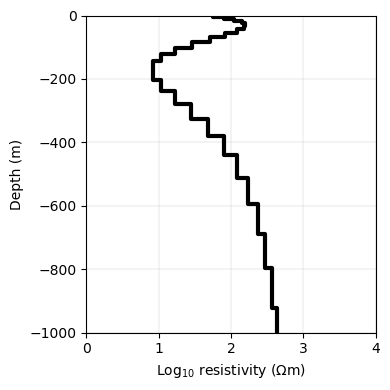

In [14]:
fig = mt.plot_model(inv_result.model);            # inverted model

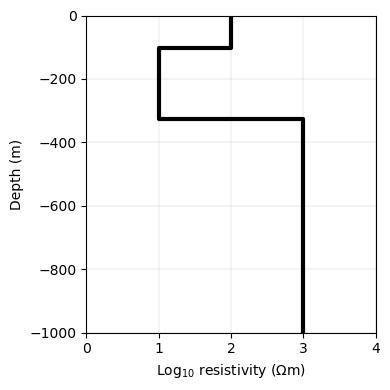

In [15]:
fig = mt.plot_model(mt.good_model);       # true model

nRMSE = 0.864


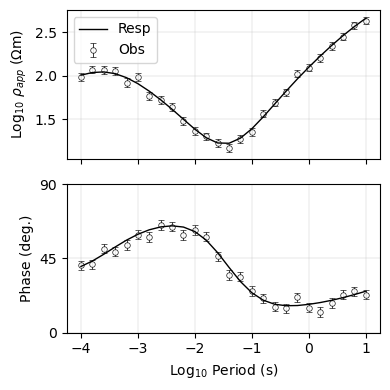

In [16]:
fig = mt.plot_data(mt.data, mt.forward(inv_result.model), Cm = mt.covariance_matrix)
nRMSE = np.sqrt(mt.misfit(mt.data, mt.forward(inv_result.model), Cm_inv = mt.inverse_covariance_matrix)/mt.data_size)
print('nRMSE = %.3f'%nRMSE)